In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [37]:
df= pd.read_csv('/kaggle/input/chocolate/Chocolate Sales.csv')

In [38]:
print(df.head())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [39]:
df.isna().sum()


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [41]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Amount'] = df['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)

print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

Missing Values:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

Duplicate Rows: 0


DISTRIBUTION OF SALES AMOUNT


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


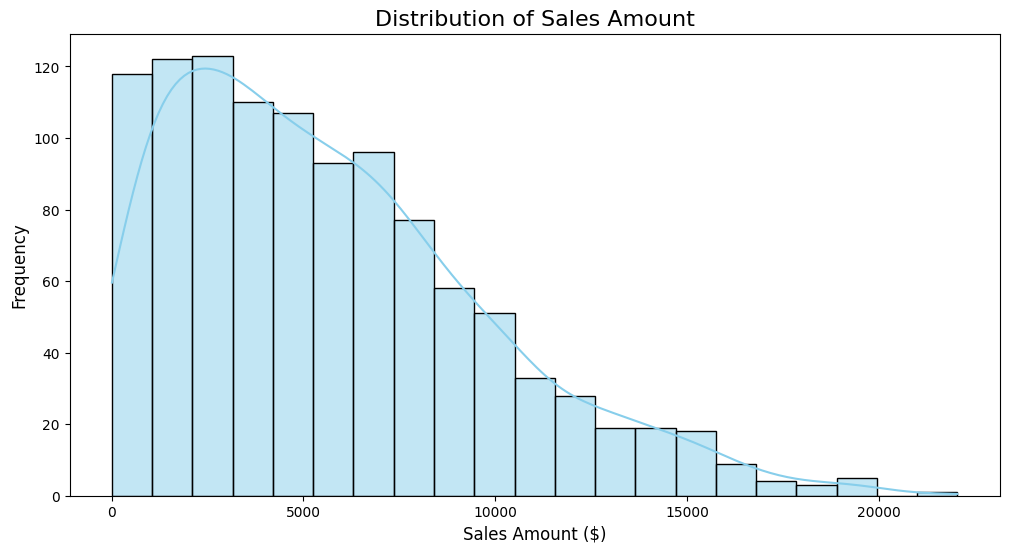

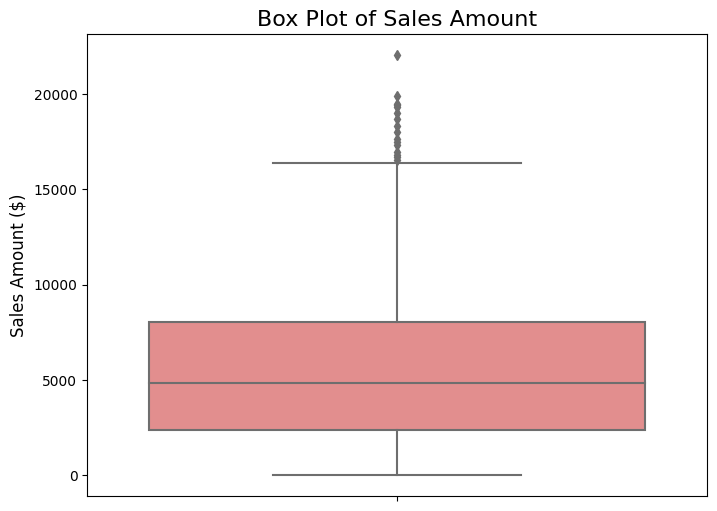

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], kde=True, color='skyblue')
plt.title('Distribution of Sales Amount', fontsize=16)
plt.xlabel('Sales Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Amount'], color='lightcoral')
plt.title('Box Plot of Sales Amount', fontsize=16)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.show()

SALES BY COUNTRY

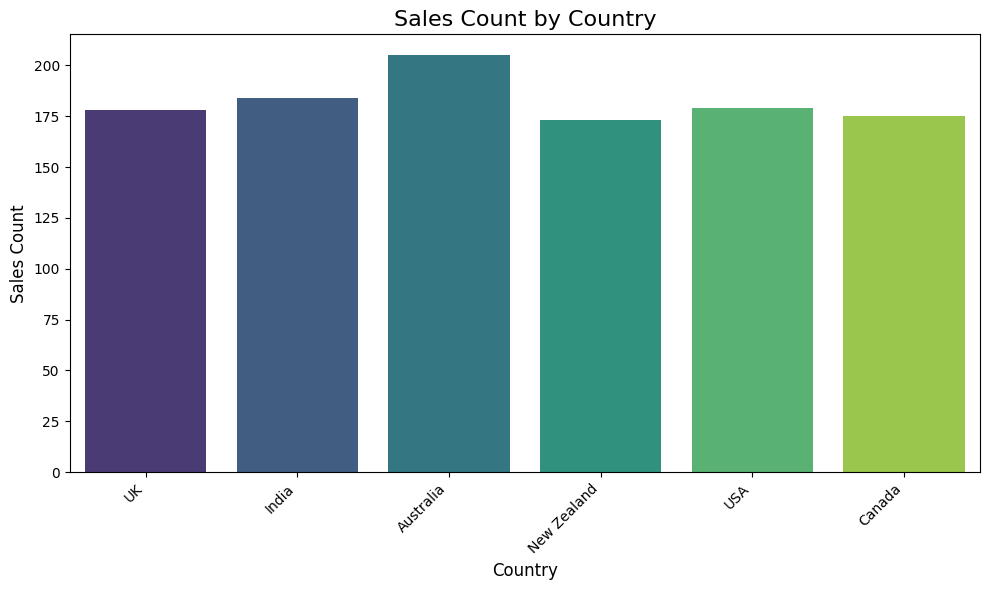

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df, palette='viridis')
plt.title('Sales Count by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

SALES BY PRODUCT

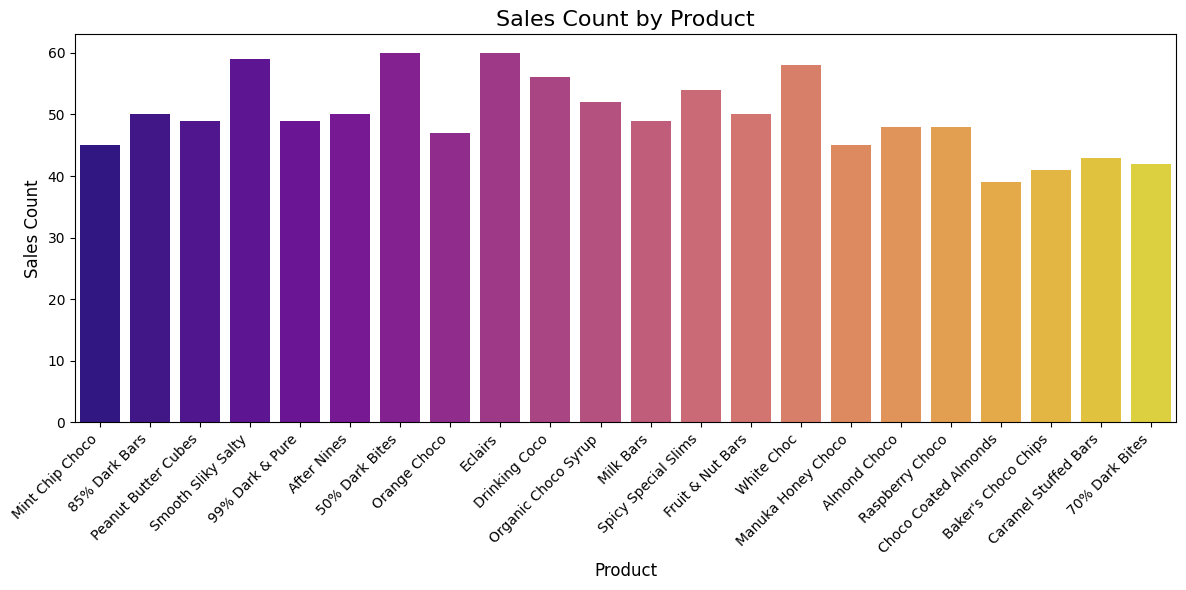

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product', data=df, palette='plasma')
plt.title('Sales Count by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

SALES BY SALES PERSON

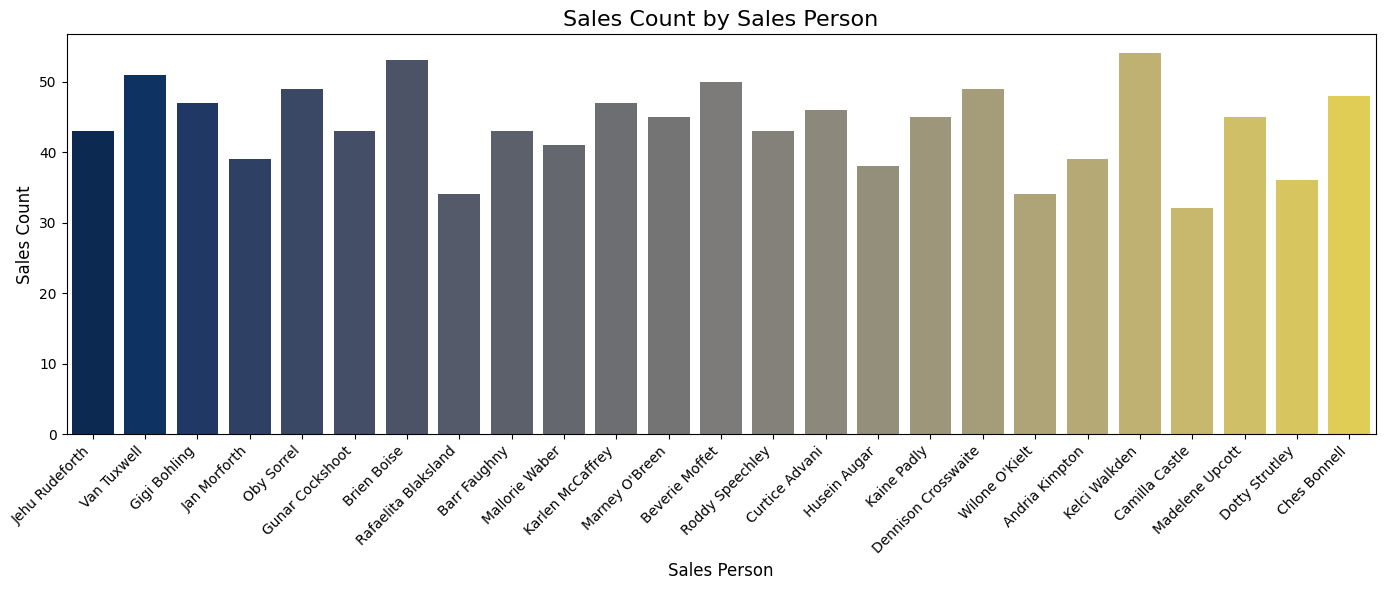

In [45]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Sales Person', data=df, palette='cividis')
plt.title('Sales Count by Sales Person', fontsize=16)
plt.xlabel('Sales Person', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

SALES OVER TIME

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


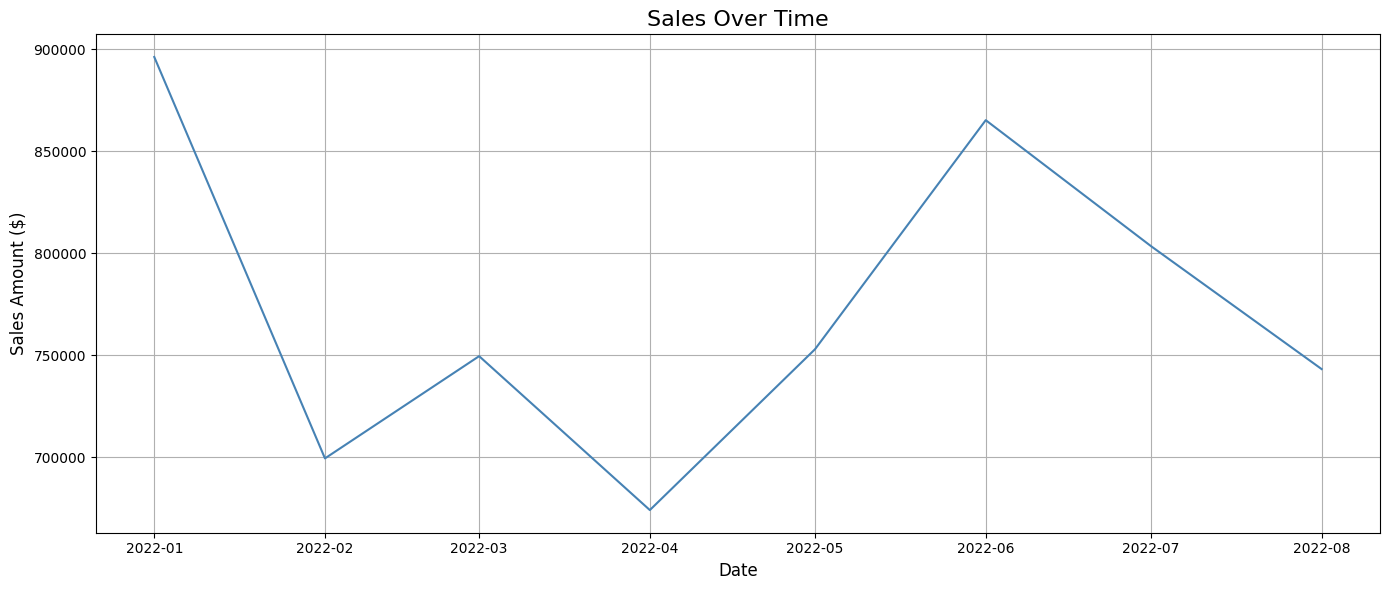

In [46]:
sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
sales_over_time['Date'] = sales_over_time['Date'].dt.to_timestamp()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Amount', data=sales_over_time, color='steelblue')
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

BOX SHIPPED DISTRIBUTION

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


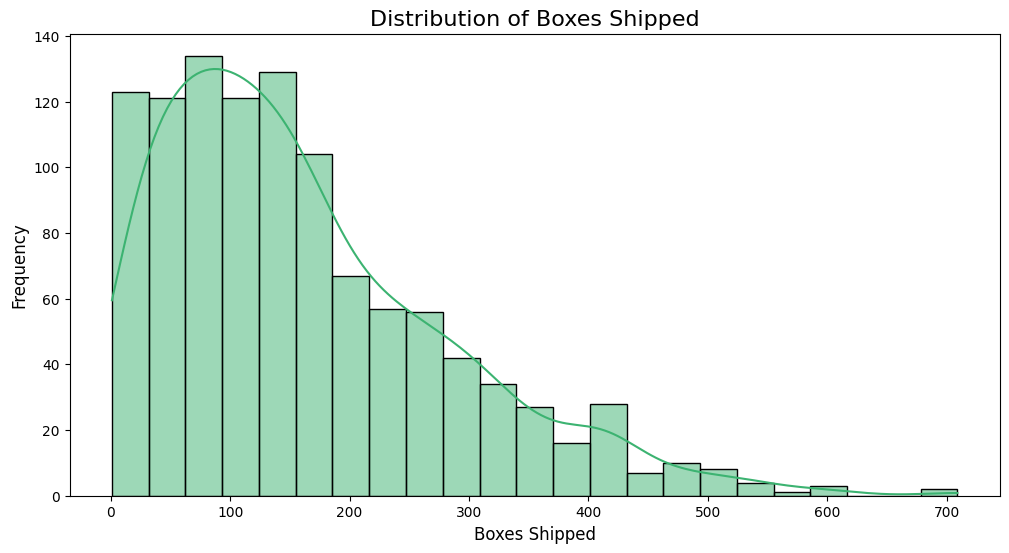

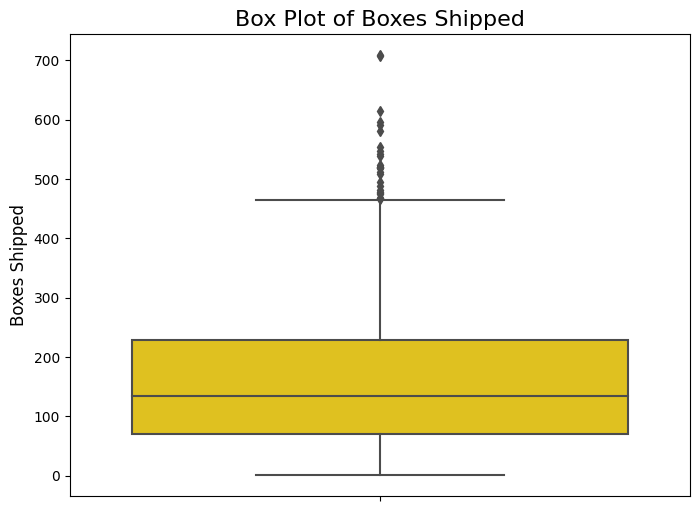

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Boxes Shipped'], kde=True, color='mediumseagreen')
plt.title('Distribution of Boxes Shipped', fontsize=16)
plt.xlabel('Boxes Shipped', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Boxes Shipped'], color='gold')
plt.title('Box Plot of Boxes Shipped', fontsize=16)
plt.ylabel('Boxes Shipped', fontsize=12)
plt.show()

SALES TRENDS BY COUNTRY AND PRODUCT

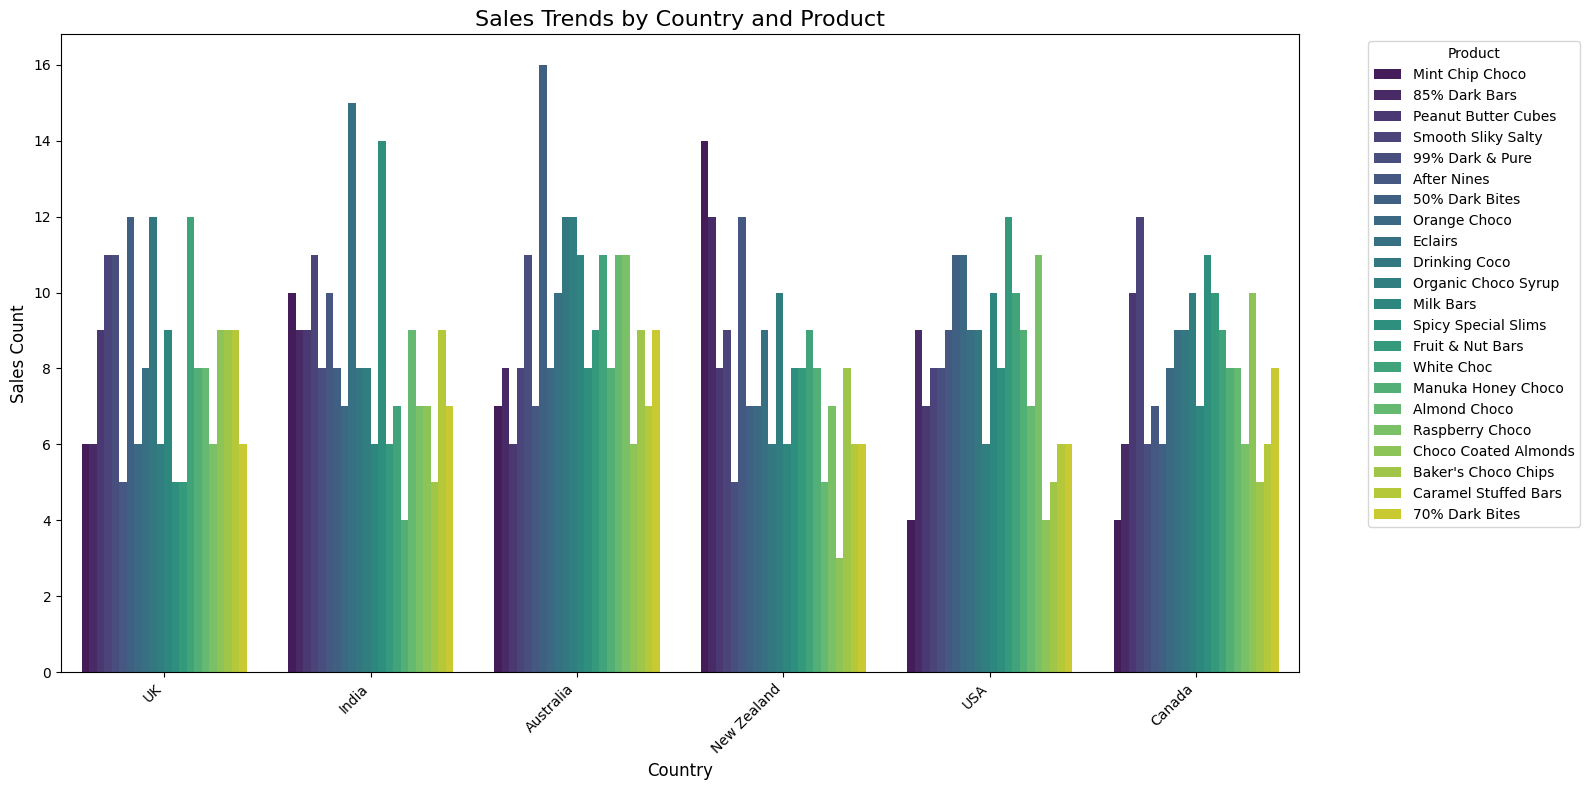

In [48]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Country', hue='Product', data=df, palette='viridis')
plt.title('Sales Trends by Country and Product', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

SALES PERFORMANCES ANALYSIS

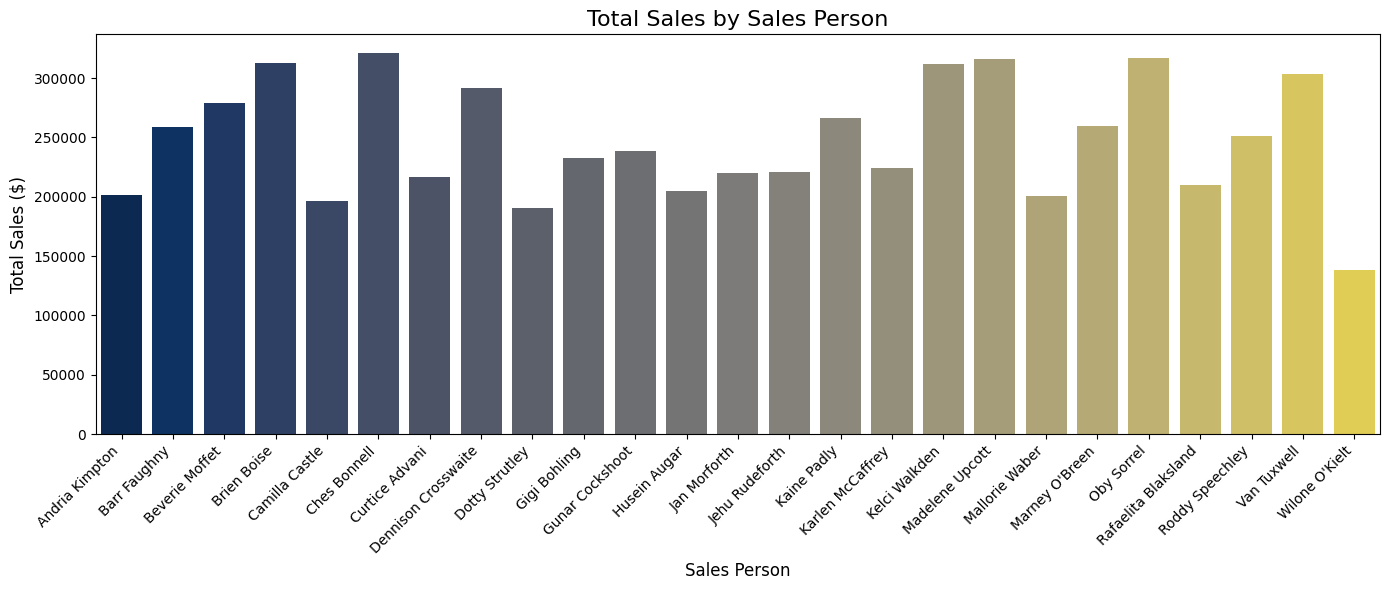

In [49]:
sales_person_sales = df.groupby('Sales Person').agg({'Amount': ['sum', 'mean']}).reset_index()
sales_person_sales.columns = ['Sales Person', 'Total Sales', 'Average Sales']

plt.figure(figsize=(14,6))
sns.barplot(x = 'Sales Person', y = 'Total Sales', data = sales_person_sales, palette = 'cividis')
plt.title('Total Sales by Sales Person', fontsize=16)
plt.xlabel('Sales Person', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()